<a href="https://colab.research.google.com/github/OJB-dx/Disease-Prediction/blob/main/Disease_Prediction_Toolkit_Building_and_Evaluating_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction model

In [28]:
# from google.colab import files
# files.upload()

In [3]:
!mkdir -p project_folder

In [8]:
import pandas as pd

In [25]:
from google.colab import files
files.upload()

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


{'heart_cleveland_upload.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition\r\n69,1,0,160,234,1,2,131,0,0.1,1,1,0,0\r\n69,0,0,140,239,0,0,151,0,1.8,0,2,0,0\r\n66,0,0,150,226,0,0,114,0,2.6,2,0,0,0\r\n65,1,0,138,282,1,2,174,0,1.4,1,1,0,1\r\n64,1,0,110,211,0,2,144,1,1.8,1,0,0,0\r\n64,1,0,170,227,0,2,155,0,0.6,1,0,2,0\r\n63,1,0,145,233,1,2,150,0,2.3,2,0,1,0\r\n61,1,0,134,234,0,0,145,0,2.6,1,2,0,1\r\n60,0,0,150,240,0,0,171,0,0.9,0,0,0,0\r\n59,1,0,178,270,0,2,145,0,4.2,2,0,2,0\r\n59,1,0,170,288,0,2,159,0,0.2,1,0,2,1\r\n59,1,0,160,273,0,2,125,0,0,0,0,0,1\r\n59,1,0,134,204,0,0,162,0,0.8,0,2,0,1\r\n58,0,0,150,283,1,2,162,0,1,0,0,0,0\r\n56,1,0,120,193,0,2,162,0,1.9,1,0,2,0\r\n52,1,0,118,186,0,2,190,0,0,1,0,1,0\r\n52,1,0,152,298,1,0,178,0,1.2,1,0,2,0\r\n51,1,0,125,213,0,2,125,1,1.4,0,1,0,0\r\n45,1,0,110,264,0,0,132,0,1.2,1,0,2,1\r\n42,1,0,148,244,0,2,178,0,0.8,0,2,0,0\r\n40,1,0,140,199,0,0,178,1,1.4,0,0,2,0\r\n38,1,0,120,231,0,0,182,1,3.8,1,0,2,1\r\n34,1,0,

In [31]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('condition', axis=1)
y = df['condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the class distribution before and after oversampling
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution before SMOTE:
condition
0    128
1    109
Name: count, dtype: int64

Class distribution after SMOTE:
condition
1    128
0    128
Name: count, dtype: int64


In [34]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
# Increase max_iter to help with convergence
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

print("Model trained successfully!")

Model trained successfully!


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7500
Precision: 0.7097
Recall: 0.7857
F1-score: 0.7458


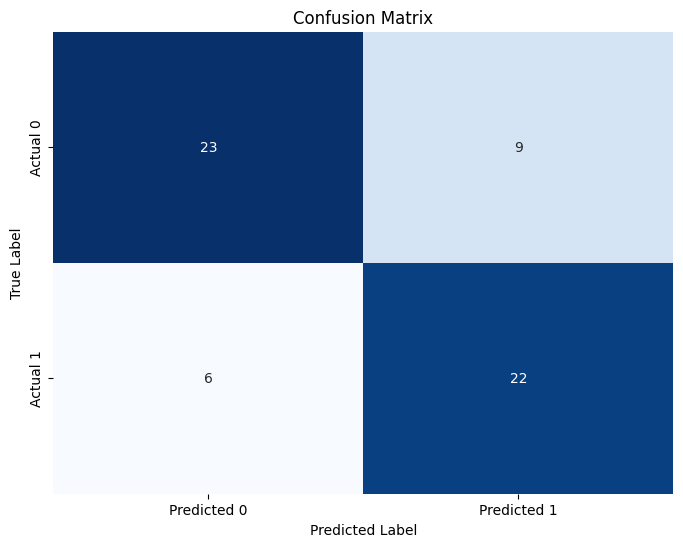

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

# You can display the predictions
print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0]
